In [1]:
import sys
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
current_dir = os.getcwd()
print(f"The current working directory is {current_dir}")
if os.path.basename(current_dir) == 'scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

The current working directory is c:\Users\ourbarn\Desktop\Customer-Experience-Analysis-for-Fintech-Apps\scripts
Changed working directory to c:\Users\ourbarn\Desktop\Customer-Experience-Analysis-for-Fintech-Apps


In [3]:
try:
    from preprocessing import ReviewPreprocessor 
    try:   
        from scraper import main as run_scraper
    except ImportError:
        from scripts.scraper import main as run_scraper
except Exception as e:
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

In [4]:
print(" 🚀🚀 Starting Scraper")
raw_df = run_scraper()

print("✅ Scraping Finished")
display(raw_df.head())

 🚀🚀 Starting Scraper
🔍 🔍 Starting Google Play Store Review Scraper...

[1/2] Fetching app information...

CBE: Commercial bank of Ethiopia
APP ID: com.combanketh.mobilebanking
Current Rating: 4.319885
Total Ratings: 38856
Total Reviews: 8336

Abyssinia: Bank of Abyssinia
APP ID: com.boa.boaMobileBanking
Current Rating: 4.200313
Total Ratings: 6340
Total Reviews: 1219

Dashen: Dashen Bank
APP ID: com.dashen.dashensuperapp
Current Rating: 4.1620946
Total Ratings: 3907
Total Reviews: 771

📁App information saved to data/raw/app_info.csv

[2/2] 📱🕷️⭐Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


🔍 Scraping reviews for com.combanketh.mobilebanking...
✅ Successfully fetched 400 reviews for com.combanketh.mobilebanking
✅Collected 400 reviews for Commercial bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:02<00:05,  2.98s/it]


🔍 Scraping reviews for com.boa.boaMobileBanking...
✅ Successfully fetched 400 reviews for com.boa.boaMobileBanking
✅Collected 400 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:05<00:02,  2.96s/it]


🔍 Scraping reviews for com.dashen.dashensuperapp...
✅ Successfully fetched 400 reviews for com.dashen.dashensuperapp
✅Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:09<00:00,  3.01s/it]


✅Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
Reviews per bank:
 Commercial bank of Ethiopia has 400 reviews.
 Bank of Abyssinia has 400 reviews.
 Dashen Bank has 400 reviews.

📁Reviews data saved to data/raw/reviews_raw.csv

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sample Reviews
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Commercial bank of Ethiopia:
------------------------------------------------------------

 Rating: ⭐⭐⭐⭐⭐ (5/5)
Review: The app makes our life easier. Thank you CBE!...
Date: 2025-11-27 18:00:06

Bank of Abyssinia:
------------------------------------------------------------

 Rating: ⭐⭐⭐⭐⭐ (5/5)
Review: good jop...
Date: 2025-11-27 13:19:25

Dashen Bank:
------------------------------------------------------------

 Rating: ⭐ (1/5)
Review: What do you care about my phone's settings? Who are you to tell me what to turn off and on? It is my phone after all. This *develoler option* thing will cost you a lot

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial bank of Ethiopia,5.2.1,Google Play
1,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial bank of Ethiopia,None,Google Play
2,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial bank of Ethiopia,None,Google Play
3,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,Yohannesb Adugna,0,None,CBE,Commercial bank of Ethiopia,5.2.1,Google Play
4,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,Mohammed Abrahim,0,None,CBE,Commercial bank of Ethiopia,5.2.1,Google Play


In [5]:
raw_df.columns

Index(['review_id', 'review_text', 'rating', 'review_date', 'user_name',
       'thumbs_up', 'reply_content', 'bank_code', 'bank_name', 'app_id',
       'source'],
      dtype='object')

In [6]:
# Initialize Preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing Finished successfully")
    df = preprocessor.df
else:
    print("❌ Preprocessing Failed ")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 277 (23.08%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-10-03 to 2025-11-29

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Bank of Abyssinia: 400
  Commercial bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 735 (61.3%)
  ⭐⭐⭐⭐: 89 (7.4%)
  ⭐⭐⭐: 67 (5.6%)
  ⭐⭐: 45 (3.8%)
  ⭐: 264 (22.0%)

Date range: 2024-10-03 to 2025-11-29

Text stati

Visualizations

C:\Users\ourbarn\AppData\Local\Temp\ipykernel_18428\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\ourbarn\AppData\Local\Temp\ipykernel_18428\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


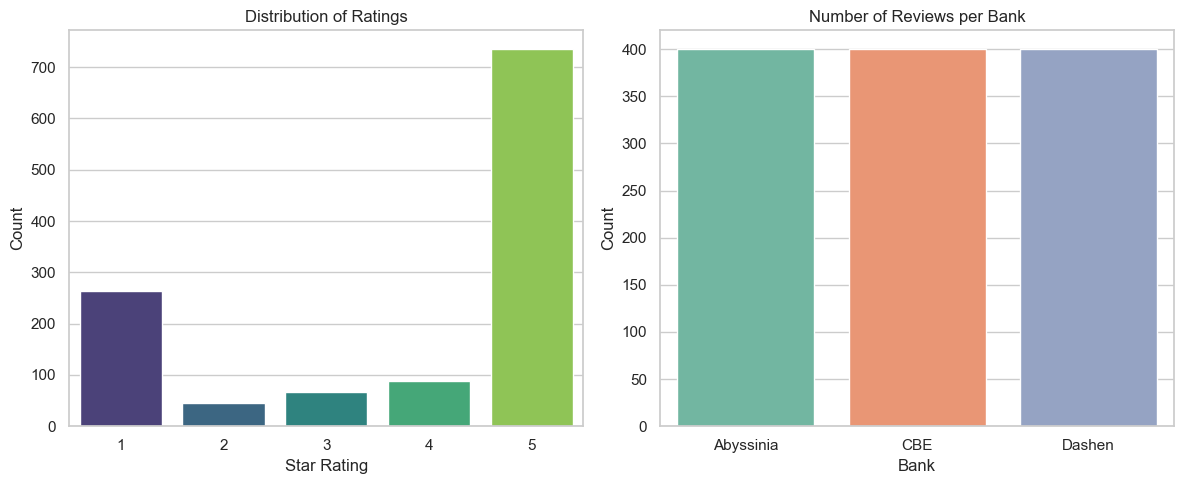

In [7]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

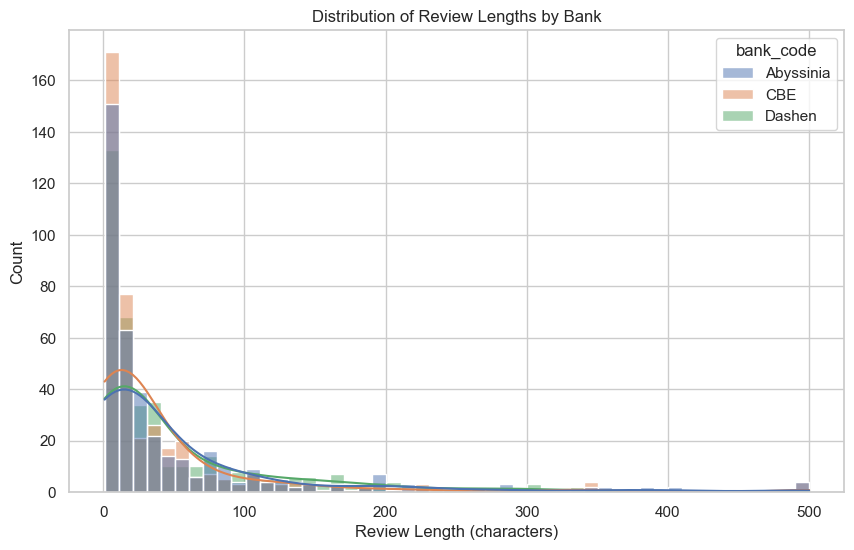

In [8]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()